<a href="https://colab.research.google.com/github/OVP2023/ML/blob/main/%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%B4%D0%B7_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 6)

import warnings
warnings.filterwarnings('ignore')

In [59]:
#Скачиваем изображение в
import cv2

img = cv2.imread('/content/drive/MyDrive/Datasets/Изображение_к_дз_по_Кластеризации_feml.jpg')

array([[[255,  92,   0],
        [255,  92,   0],
        [253,  93,   0],
        ...,
        [245,  72,   0],
        [245,  72,   0],
        [245,  72,   0]],

       [[255,  92,   0],
        [255,  92,   0],
        [253,  93,   0],
        ...,
        [246,  73,   0],
        [246,  73,   0],
        [246,  73,   0]],

       [[254,  94,   0],
        [253,  93,   0],
        [253,  93,   0],
        ...,
        [246,  73,   0],
        [246,  73,   0],
        [246,  73,   0]],

       ...,

       [[134,  51,   0],
        [134,  51,   0],
        [130,  48,   1],
        ...,
        [101,  65,  59],
        [103,  68,  55],
        [101,  66,  52]],

       [[129,  47,   0],
        [129,  49,   2],
        [128,  49,   6],
        ...,
        [153, 158, 149],
        [154, 158, 147],
        [147, 154, 141]],

       [[135,  55,   8],
        [119,  41,   0],
        [115,  35,   0],
        ...,
        [189, 213, 203],
        [187, 212, 202],
        [182, 208, 195]]], dtype=uint8)
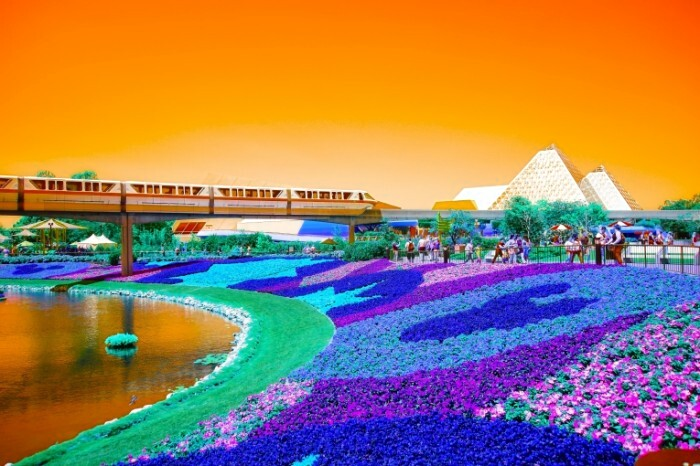

In [60]:
img

array([[[  0,  92, 255],
        [  0,  92, 255],
        [  0,  93, 253],
        ...,
        [  0,  72, 245],
        [  0,  72, 245],
        [  0,  72, 245]],

       [[  0,  92, 255],
        [  0,  92, 255],
        [  0,  93, 253],
        ...,
        [  0,  73, 246],
        [  0,  73, 246],
        [  0,  73, 246]],

       [[  0,  94, 254],
        [  0,  93, 253],
        [  0,  93, 253],
        ...,
        [  0,  73, 246],
        [  0,  73, 246],
        [  0,  73, 246]],

       ...,

       [[  0,  51, 134],
        [  0,  51, 134],
        [  1,  48, 130],
        ...,
        [ 59,  65, 101],
        [ 55,  68, 103],
        [ 52,  66, 101]],

       [[  0,  47, 129],
        [  2,  49, 129],
        [  6,  49, 128],
        ...,
        [149, 158, 153],
        [147, 158, 154],
        [141, 154, 147]],

       [[  8,  55, 135],
        [  0,  41, 119],
        [  0,  35, 115],
        ...,
        [203, 213, 189],
        [202, 212, 187],
        [195, 208, 182]]], dtype=uint8)
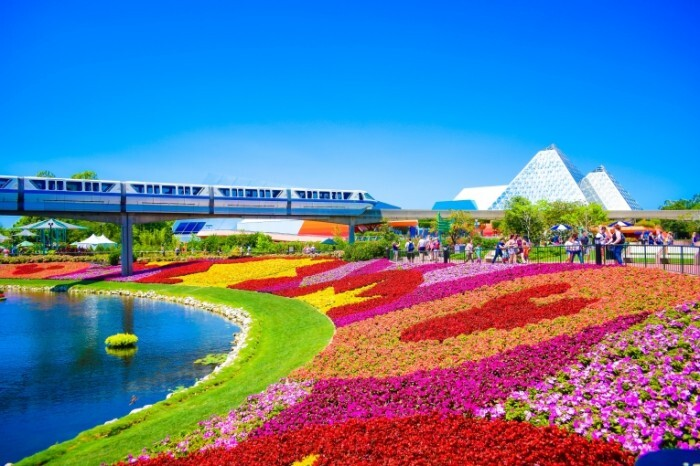

In [61]:
# Преобразуйте изображение в формат RGB (если оно в формате BGR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img

array([[[  0,  93, 253],
        [  0,  96, 255],
        [  0,  97, 254],
        ...,
        [  0,  76, 248],
        [  0,  75, 247],
        [  0,  73, 246]],

       [[  0,  96, 255],
        [  0,  97, 254],
        [  1, 100, 255],
        ...,
        [  1,  79, 250],
        [  1,  77, 249],
        [  0,  76, 248]],

       [[  0,  97, 253],
        [  1, 100, 255],
        [  0, 101, 255],
        ...,
        [  0,  79, 250],
        [  1,  79, 250],
        [  0,  78, 249]],

       ...,

       [[  1,  52, 129],
        [  0,  52, 132],
        [  1,  57, 129],
        ...,
        [  0,  28, 129],
        [  1,  22, 113],
        [  1,  17, 131]],

       [[  0,  52, 127],
        [ 11,  49, 120],
        [  2,  50, 122],
        ...,
        [ 10,  19, 122],
        [  0,  24, 129],
        [  2,  21, 115]],

       [[  4,  47, 126],
        [203, 217, 218],
        [ 94, 142,  74],
        ...,
        [160, 193, 213],
        [  6,  30, 108],
        [119, 127, 135]]], dtype=uint8)
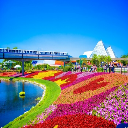

In [62]:
img_small = cv2.resize(img, (128, 128)) #уменьшаем размер массива до 128х128
img_small

In [63]:
print(img_small.shape)

(128, 128, 3)


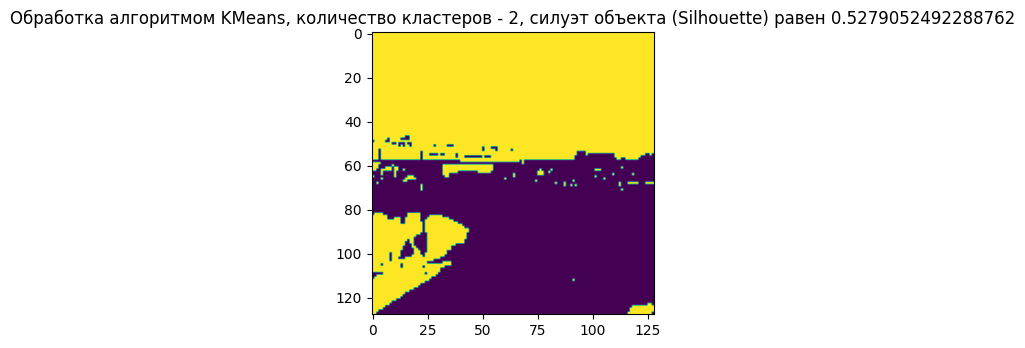

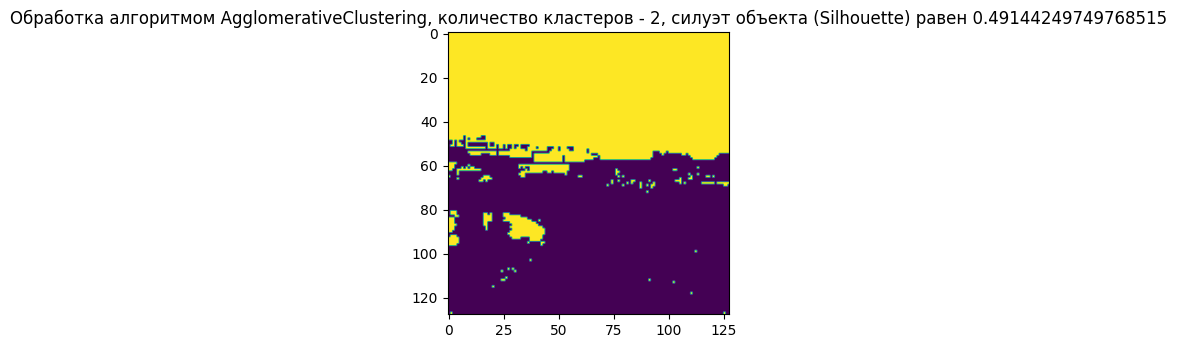

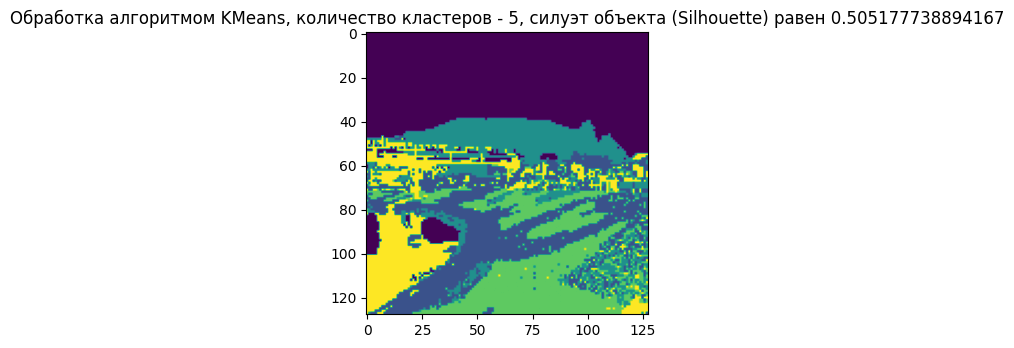

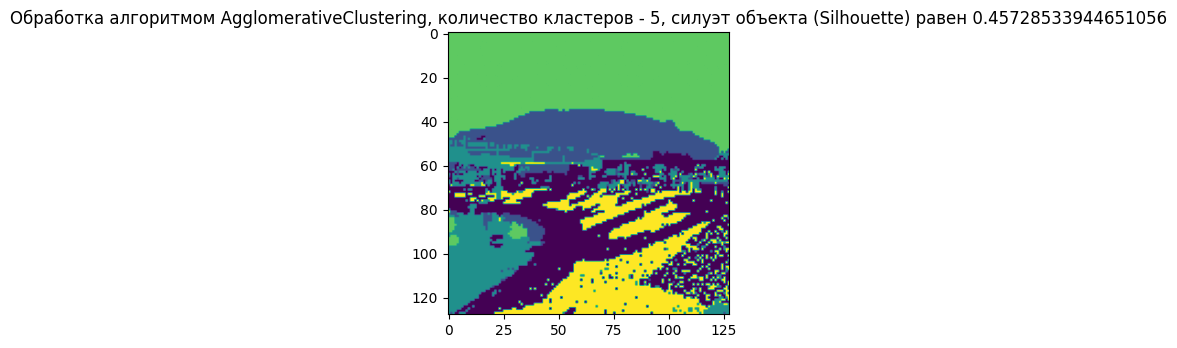

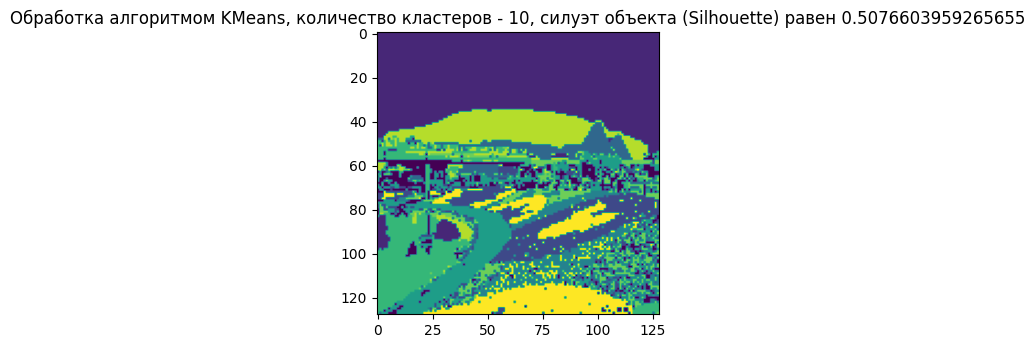

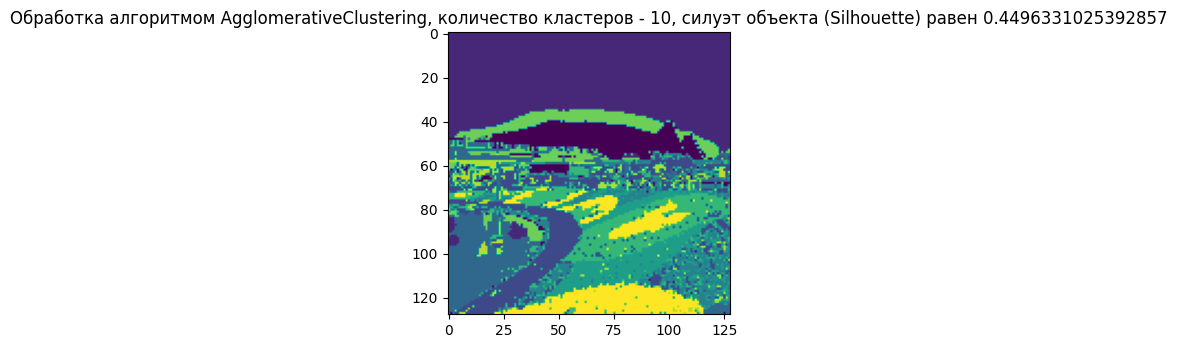

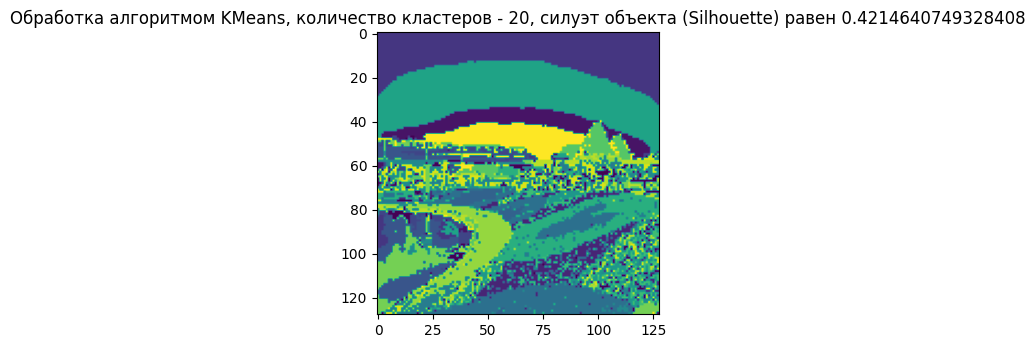

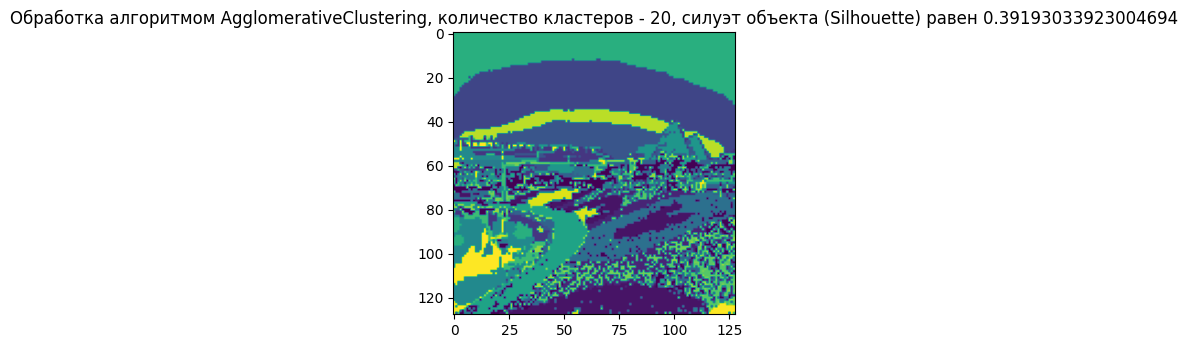

In [64]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

algorithms = [
    KMeans(n_clusters=2),
    AgglomerativeClustering(n_clusters=2),
    KMeans(n_clusters=5),
    AgglomerativeClustering(n_clusters=5),
    KMeans(n_clusters=10),
    AgglomerativeClustering(n_clusters=10),
    KMeans(n_clusters=20),
    AgglomerativeClustering(n_clusters=20),
]
X=img_small.reshape((-1, 3))
height_s, width_s, channels_s = img_small.shape
i=0
list_=[2,2,5,5,10,10,20,20]
for  algorithm in algorithms:
    clusters = algorithm.fit_predict(X)
    if algorithm.__class__.__name__ in {'KMeans'}:
        centers = algorithm.cluster_centers_
        label_kmeans=algorithm.labels_
        segmented_img_kmeans = label_kmeans.reshape((height_s, width_s))
        plt.subplot(1, 2, 2)
        title_='Обработка алгоритмом KMeans, количество кластеров - '+str(list_[i])+', cилуэт объекта (Silhouette) равен '+str(metrics.silhouette_score(X, algorithm.labels_))
        plt.title(title_)
        plt.imshow(segmented_img_kmeans, cmap='viridis')
        plt.show()
    if algorithm.__class__.__name__ in {'AgglomerativeClustering'}:
        label_ac=algorithm.labels_
        segmented_img_ac = label_ac.reshape((height_s, width_s))
        plt.subplot(1, 2, 2)
        title_='Обработка алгоритмом AgglomerativeClustering, количество кластеров - '+str(list_[i])+', cилуэт объекта (Silhouette) равен '+str(metrics.silhouette_score(X, algorithm.labels_))
        plt.title(title_)
        plt.imshow(segmented_img_ac, cmap='viridis')
        plt.show()
    i+=1


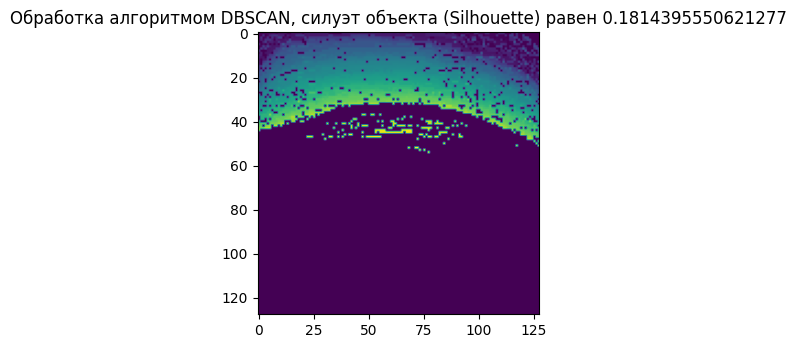

In [65]:
from sklearn.cluster import DBSCAN

X3=img_small.reshape((-1, 3))
height_s, width_s, channels_s = img_small.shape

model = DBSCAN()
preds = model.fit_predict(X3)

label_dbscan=model.labels_
segmented_img_dbscan = label_dbscan.reshape((height_s, width_s))

plt.subplot(1, 2, 2)
title_='Обработка алгоритмом DBSCAN'+', cилуэт объекта (Silhouette) равен '+str(metrics.silhouette_score(X3, model.labels_))
plt.title(title_)
plt.imshow(segmented_img_dbscan, cmap='viridis')
plt.show()

Вывод: Исходя из метрики Silhouette  лучше всех с кластеризацией этого изображения справляется KMeans, немного отстает AgglomerativeClustering. К сожалению, не смог использовать метрику SSIM, так как не удалось первоначальное изображение привести к тем же разрешениям, что и изображения, полученные после применения кластеризации.

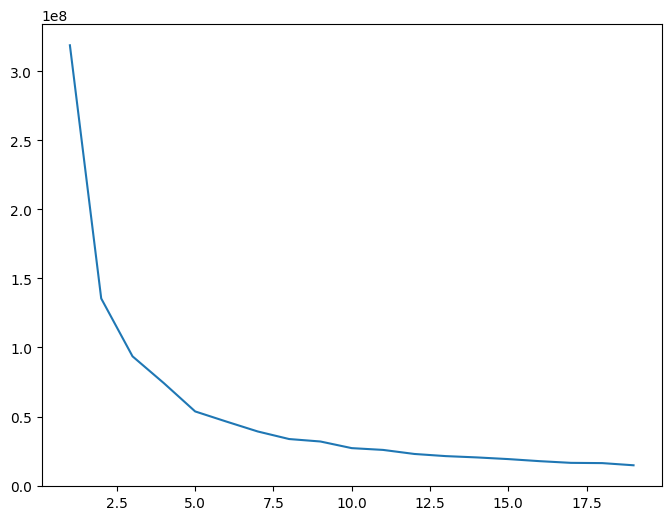

In [48]:
#Подбор количества кластеров для KMeans (KMeans минимизирует сумму квадратов расстояний объектов классов до их центроидов. В обученном классификаторе это значение находится в поле inertia_)


k_inertia = []
ks = range(1,20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X)
    k_inertia.append(clf_kmeans.inertia_)

plt.plot(ks, k_inertia);

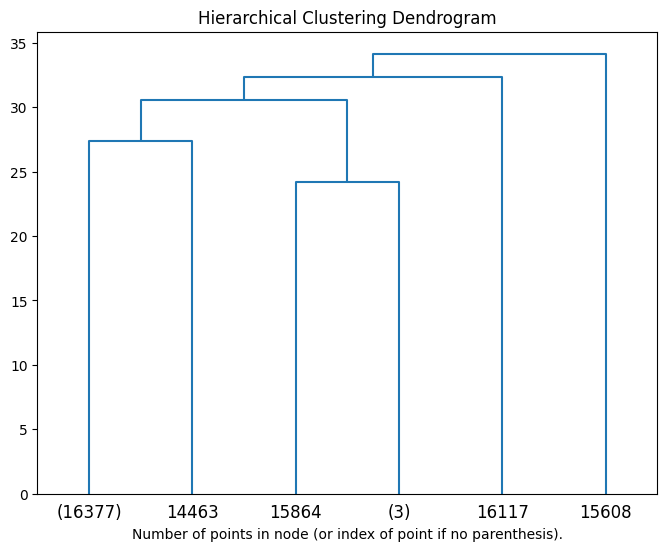

In [51]:
#Подбор количества кластеров Агломеративная кластеризация  через дендрограмму
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)


model_ac = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='single')

model2 = model_ac.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model2, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()